# Solar Cycle Analysis

This plots data written by the `process_uncertainties.py` script.

In [16]:
import sys

from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("..")
from constants import MIN_DAYSAHEAD, MAX_DAYSAHEAD, BIN_FREQ_PER_DAY

sns.set()

In [17]:
!ls ../../data/processed/gaussian2/k35/

ls: cannot access '../../data/processed/gaussian2/k35/': No such file or directory


In [18]:
tag = "rfr"

df = pd.read_csv(f"../data/processed/{tag}/processed_daysahead3_R000.csv")
df["current_time"] = pd.to_datetime(df["current_time"])
df

,current_time,forward_time,forward_Vp_pred,forward_Vp_obs,forward_loc,forward_scale,forward_shape,forward_crps
0,2010-01-04 06:00:00,2010-01-07 00:00:00,316.100000,289.23,266.120778,102.774443,4.826533,28.892018
1,2010-01-04 12:00:00,2010-01-07 06:00:00,309.375000,297.19,274.357483,105.203490,4.098651,29.988916
2,2010-01-04 18:00:00,2010-01-07 12:00:00,302.650000,286.61,268.892979,109.250224,5.604289,35.611528
3,2010-01-05 00:00:00,2010-01-07 18:00:00,306.100000,283.42,263.770680,107.342977,5.216177,33.255064
4,2010-01-05 06:00:00,2010-01-08 00:00:00,317.327273,309.38,265.250893,109.555652,5.626130,21.160035
...,...,...,...,...,...,...,...,...
16042,2020-12-27 18:00:00,2020-12-30 12:00:00,384.250000,476.30,350.035018,140.460629,2.554455,26.018915
16043,2020-12-28 00:00:00,2020-12-30 18:00:00,469.000000,454.90,278.499837,145.178138,4.609510,44.284000
16044,2020-12-28 06:00:00,2020-12-31 00:00:00,453.683333,433.50,359.557735,142.467132,4.377726,22.964804
16045,2020-12-28 12:00:00,2020-12-31 06:00:00,438.366667,382.20,349.103155,152.407722,4.508913,43.601248


In [19]:
sc_min = datetime(2010, 1, 1)
sc_max = datetime(2014, 6, 1)
sc_min2 = datetime(2020, 1, 1)

In [20]:
delta = timedelta(days=365)

min_start1 = sc_min
min_end1 = sc_min + delta - timedelta(days=1)
min_start2 = sc_min2 - delta
min_end2 = sc_min2 + delta

max_start = sc_max - delta
max_end = sc_max + delta

forward_idx = 0

strftime = "%Y"
min_label = "Around Solar Minimum\n(2010, 2019-2020)"

strftime = "%b%Y"
max_label = "Around Solar Maximum\n(%s - %s)" % (
    max_start.strftime(strftime),
    max_end.strftime(strftime),
)

(4356,)
(2921,)


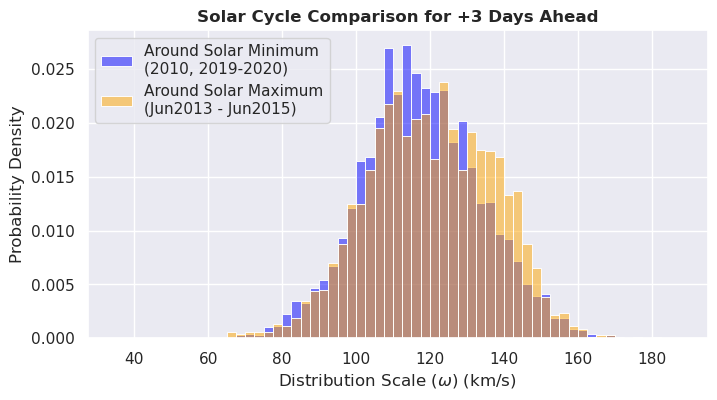

In [21]:
bins = np.arange(35, 190, 2.5)
sigmas_min = df[
    df["current_time"].between(min_start1, min_end1)
    | df["current_time"].between(min_start2, min_end2)
][f"forward_scale"]
sigmas_max = df[df["current_time"].between(max_start, max_end)][f"forward_scale"]

print(sigmas_min.shape)
print(sigmas_max.shape)

plt.figure(figsize=(8, 4))
sns.histplot(
    sigmas_min, color="blue", label=min_label, bins=bins, stat="density", alpha=0.5
)
sns.histplot(
    sigmas_max, color="orange", label=max_label, bins=bins, stat="density", alpha=0.5
)
plt.xlabel(r"Distribution Scale ($\omega$) (km/s)")
plt.ylabel("Probability Density")
plt.legend()
plt.title("Solar Cycle Comparison for +3 Days Ahead", fontweight="bold")
plt.savefig("../plots/solarcycle.png", dpi=300, bbox_inches="tight")